# Project Overview
In this project, I delved into the intricate relationship between stock prices and news headlines through a comprehensive hybrid model. The objective is to perform a detailed numerical analysis of Sensex stock data spanning from 2015 to 2024 and conduct a robust textual analysis using news headlines data dating back to 2001.

# Approach:

Numerical Analysis: We utilized statistical methods to predict stock prices based on historical Sensex data from 2015 to 2024. This analysis includes examining trends, patterns, and statistical correlations to forecast future stock prices.

Textual Analysis: Sentiment analysis was applied to news headlines data starting from 2001. By evaluating the sentiments expressed in these headlines, we assessed their potential impact on stock prices, providing a qualitative layer to our analysis.

Hybrid Model Development: The core of the project is a hybrid model that merges the predictions from both the numerical and textual analyses. By integrating statistical forecasts with sentiment-driven insights, the model aims to predict stock closing prices more effectively. This approach involves using the sentiment scores derived from news headlines to adjust and refine the stock price predictions.

# Numerical Analysis

In [570]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import csv
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

In [651]:
stocks = yf.download('^BSESN', start='2010-01-01', end='2024-01-01').reset_index()

[*********************100%%**********************]  1 of 1 completed


In [652]:
print(stocks.shape)
stocks.tail()

(3441, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
3436,2023-12-22,71045.648438,71259.546875,70713.562500,71106.960938,71106.960938,15300
3437,2023-12-26,71097.781250,71471.289062,71012.078125,71336.796875,71336.796875,7700
3438,2023-12-27,71492.023438,72119.851562,71473.648438,72038.429688,72038.429688,9800
3439,2023-12-28,72262.671875,72484.343750,72137.453125,72410.382812,72410.382812,7800
3440,2023-12-29,72351.593750,72417.007812,72082.640625,72240.257812,72240.257812,19800


In [653]:
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,17473.449219,17582.839844,17378.380859,17558.730469,17558.730469,28200
1,2010-01-05,17555.769531,17729.779297,17555.769531,17686.240234,17686.240234,27000
2,2010-01-06,17719.470703,17790.330078,17636.710938,17701.130859,17701.130859,21400
3,2010-01-07,17701.970703,17733.339844,17566.539062,17615.720703,17615.720703,18000
4,2010-01-08,17603.869141,17658.119141,17508.960938,17540.289062,17540.289062,17200


In [654]:
stocks.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [655]:
stocks=stocks.set_index('Date')

# Visualization

Text(0.5, 1.0, 'Closing Price Since 2010')

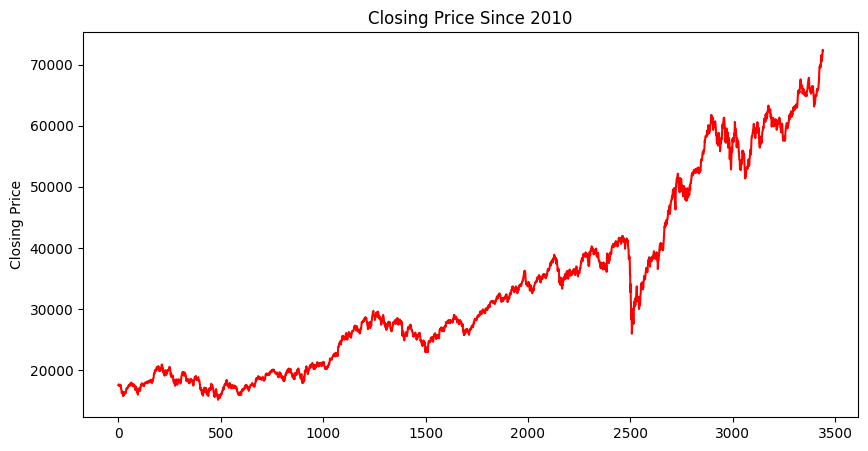

In [668]:
plt.figure(figsize = (10,5))
plt.plot(stocks["Close"], color = "red")
plt.ylabel("Closing Price")
plt.title("Closing Price Since 2010")

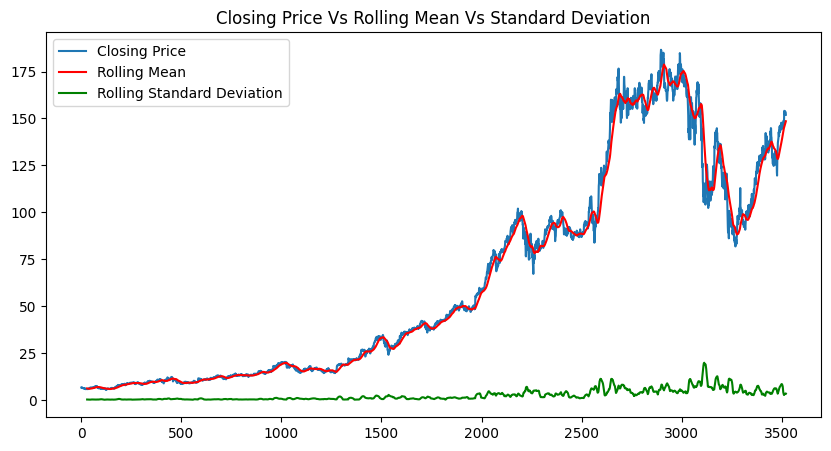

In [636]:
stocks = stocks.reset_index()
moving_avg =  stocks["Close"].rolling(window = 30).mean()
std =  stocks["Close"].rolling(window = 30).std()
plt.figure(figsize = (10,5))
plt.plot(stocks["Close"], label = "Closing Price")
plt.plot(moving_avg, label  = "Rolling Mean", color = "red")
plt.plot(std,label = "Rolling Standard Deviation", color = "green")
plt.title("Closing Price Vs Rolling Mean Vs Standard Deviation")
plt.legend()

In [658]:
stocks = stocks.reset_index()
train = stocks[(stocks["Date"]> pd.Timestamp("2010-01-01"))&(stocks["Date"]< pd.Timestamp("2023-01-01"))]
train.tail(5)
test = stocks[stocks["Date"]> pd.Timestamp("2022-12-31")]
train.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,17473.449219,17582.839844,17378.380859,17558.730469,17558.730469,28200
1,2010-01-05,17555.769531,17729.779297,17555.769531,17686.240234,17686.240234,27000
2,2010-01-06,17719.470703,17790.330078,17636.710938,17701.130859,17701.130859,21400
3,2010-01-07,17701.970703,17733.339844,17566.539062,17615.720703,17615.720703,18000
4,2010-01-08,17603.869141,17658.119141,17508.960938,17540.289062,17540.289062,17200


ADF test Statistic:1.0641199881556276
p-value:0.994898462701243
#tags used:7
Number of observations used:3433
Do not reject the null hypothesis, the time series is not stationary


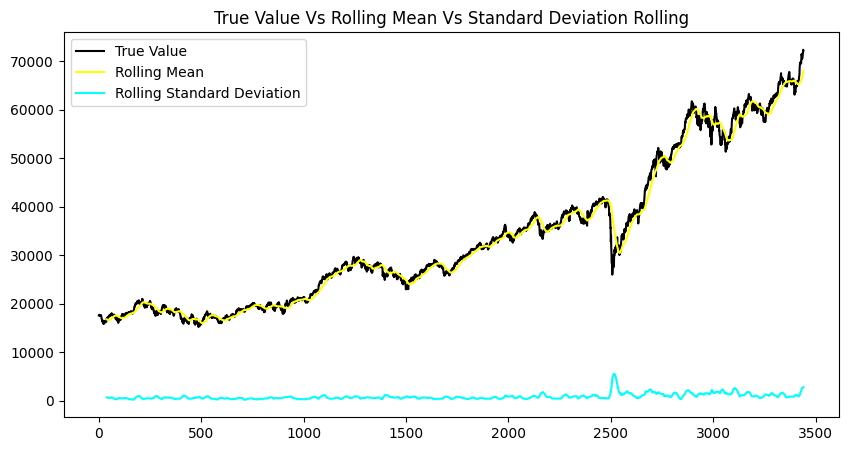

In [659]:
#test Stationary
def test_stationarity(timeseries):
  roll_mean  =  timeseries.rolling(40).mean()
  roll_std =  timeseries.rolling(40).std()
  plt.figure(figsize=(10,5))
  plt.plot(timeseries, color ="Black", label = "True Value")
  plt.plot(roll_mean, color = "Yellow", label = "Rolling Mean")
  plt.plot(roll_std, color = "cyan", label = "Rolling Standard Deviation")
  plt.legend()
  plt.title("True Value Vs Rolling Mean Vs Standard Deviation Rolling")
  result = adfuller(timeseries, autolag = 'AIC')
  labels = ['ADF test Statistic', 'p-value', "#tags used", "Number of observations used"]
  for value, label in zip(result,labels):
    print(label+":"+str(value))
  if result[1] < 0.05:
    print("Reject the Null Hypothesis (Ho), The time series is stationary")
  else:
    print("Do not reject the null hypothesis, the time series is not stationary")
test_stationarity(stocks["Close"])

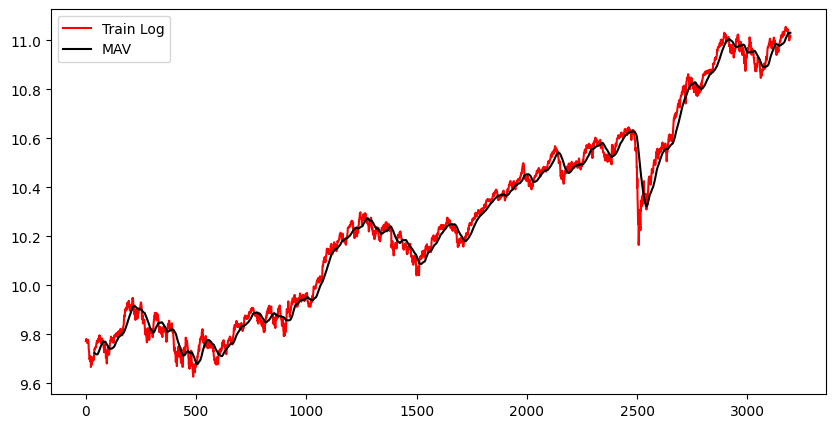

In [660]:
#Using the log values
train_l = np.log(train["Close"])
test_l  = np.log(test["Close"])
m_avg = train_l.rolling(40).mean()
plt.figure(figsize  = (10,5))
plt.plot(train_l, color = "Red",label = "Train Log")
plt.plot(m_avg, color = "black", label = "MAV")
plt.legend()

ADF test Statistic:-0.23473799458930353
p-value:0.9342522740294738
#tags used:12
Number of observations used:3183
Do not reject the null hypothesis, the time series is not stationary


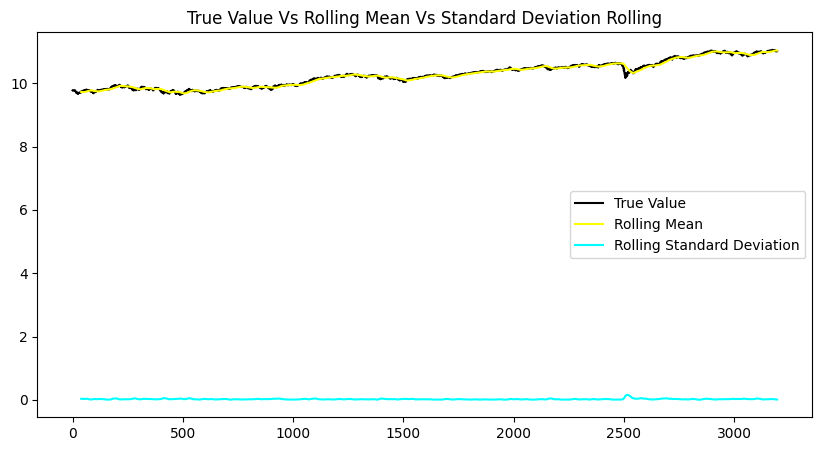

In [661]:
train_l = train_l.dropna()
test_l = test_l.dropna()
test_stationarity(train_l)

ADF test Statistic:-9.209112121015965
p-value:1.9089761294292304e-15
#tags used:12
Number of observations used:3144
Reject the Null Hypothesis (Ho), The time series is stationary


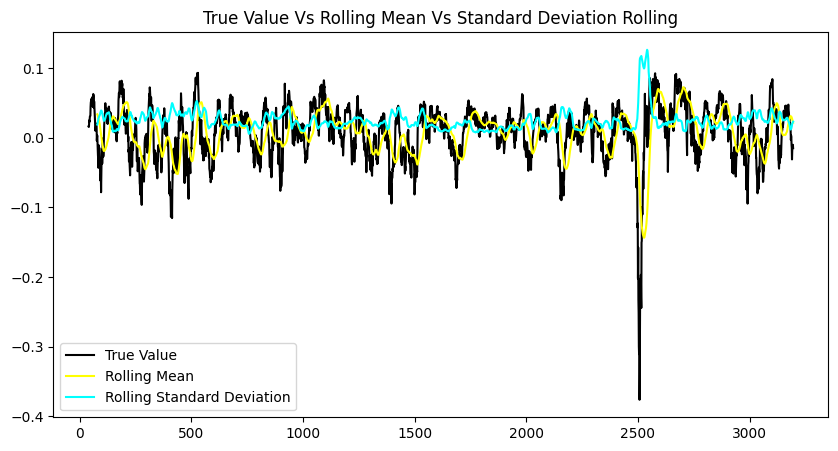

In [662]:
train_log_diff = train_l - m_avg
train_log_diff=train_log_diff.dropna()
test_stationarity(train_log_diff)

In [663]:
from pmdarima import auto_arima
model = auto_arima(train_l, trace =True, error_action = 'ignore', suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-19762.333, Time=1.98 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-19770.334, Time=0.48 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-19768.511, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-19768.509, Time=1.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-19768.312, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-19766.443, Time=5.56 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 9.839 seconds


In [665]:
model.fit(train_l)
predictions = model.predict(n_periods = len(test_l))
predictions = pd.DataFrame(predictions, index =test_l.index, columns = ["Predictions"])
predictions.head()

,Predictions
3196,11.016404
3197,11.016793
3198,11.017182
3199,11.017571
3200,11.017959


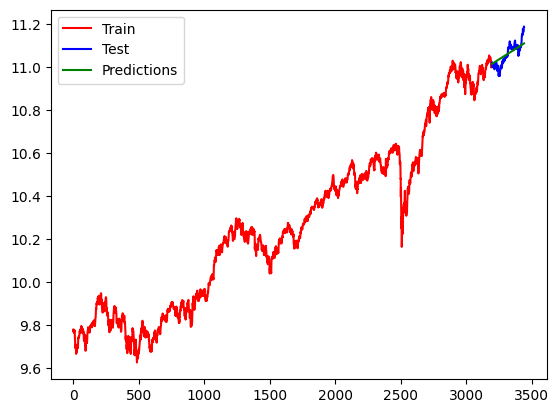

In [666]:
plt.plot(train_l, color = "Red", label ="Train")
plt.plot(test_l, color = "blue", label = "Test")
plt.plot(predictions["Predictions"], label = "Predictions", color = "Green")
plt.legend()

In [667]:
rms = np.sqrt(mean_squared_error(test_l,predictions["Predictions"]))
print("Root Mean Sq Error:", rms)

Root Mean Sq Error: 0.03194281591127834


# Textual Analysis

In [414]:
from sklearn.model_selection import GridSearchCV,train_test_split, KFold,StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.feature_extraction.text import TfidfVectorizer
import math
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestRegressor
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [34]:
headlines = pd.read_csv("E://india-news-headlines.csv", encoding = "ISO-8859-1")

In [35]:
headlines.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [36]:
headlines =headlines.drop("headline_category" , axis = 1)
headlines.head(1)

,publish_date,headline_text
0,20010102,Status quo will not be disturbed at Ayodhya; s...


In [37]:
headlines["publish_date"] = pd.to_datetime(headlines["publish_date"], format = '%Y%m%d')
headlines.head(1)

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...


In [38]:
headlines.isnull().sum()

publish_date     0
headline_text    0
dtype: int64

In [39]:
headlines.shape

(3650970, 2)

In [40]:
headlines =  headlines.drop_duplicates()
headlines.shape

(3488872, 2)

In [41]:
headlines = headlines.groupby("publish_date")["headline_text"].apply(lambda x: ' '.join(x)).reset_index()
headlines["headline_text"][1]

"Powerless north India gropes in the dark Think again; Laxman tells Sangh Parivar Hurriyat undecided over team to Pakistan Vajpayee wants to put reforms on fast track Stephen Hawking keeps date with Mumbai Anti-Hrithik or anti-hopelessness Govt plans stadium near Panaji BJP doing a volte face on casinos: Cong 3 watershed projects on the anvil No report yet on fire in Udyog Bhavan He is the king of 'five star' industry Petrol pump sealed for selling adulterated fuel Milk price up by Rs 1 per litre Congress House is no-smoking zone Rural weightage: Govt reassures Governor Bride gets honeymoon surprise: Chopper ride Is hangover a sign of alcoholicism? Almatti: AP to wait and watch 10-year-old girl missing Hear his messages from the heart Dance like no one's watching From reel love to real love Power row: Bribe attempt charge denied Lakshamma's cry for help heard It's shopping time for your newborn Con games on the catwalk They are here to help us These noisy spots are hurting your ears Fl

In [42]:
headlines =  headlines.replace("[^a-zA-Z]"," ", regex=True)
headlines["headline_text"] = headlines["headline_text"].str.lower()
headlines["headline_text"][1]

'powerless north india gropes in the dark think again  laxman tells sangh parivar hurriyat undecided over team to pakistan vajpayee wants to put reforms on fast track stephen hawking keeps date with mumbai anti hrithik or anti hopelessness govt plans stadium near panaji bjp doing a volte face on casinos  cong   watershed projects on the anvil no report yet on fire in udyog bhavan he is the king of  five star  industry petrol pump sealed for selling adulterated fuel milk price up by rs   per litre congress house is no smoking zone rural weightage  govt reassures governor bride gets honeymoon surprise  chopper ride is hangover a sign of alcoholicism  almatti  ap to wait and watch    year old girl missing hear his messages from the heart dance like no one s watching from reel love to real love power row  bribe attempt charge denied lakshamma s cry for help heard it s shopping time for your newborn con games on the catwalk they are here to help us these noisy spots are hurting your ears fl

In [43]:
def add_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def add_polarity(text):
  return TextBlob(text).sentiment.polarity

In [44]:
headlines["subjectivity"] = headlines["headline_text"].apply(add_subjectivity)
headlines["polarity"] = headlines["headline_text"].apply(add_polarity)

In [45]:
headlines.head(1)

,publish_date,headline_text,subjectivity,polarity
0,2001-01-02,status quo will not be disturbed at ayodhya s...,0.298684,0.180702


<Axes: xlabel='subjectivity', ylabel='Count'>

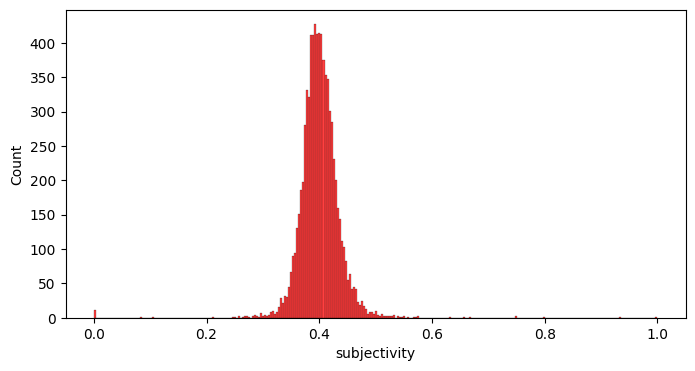

In [47]:
import seaborn as sns
plt.figure(figsize =(8,4))
sns.histplot(headlines['subjectivity'], color = 'Red')

<Axes: xlabel='polarity', ylabel='Count'>

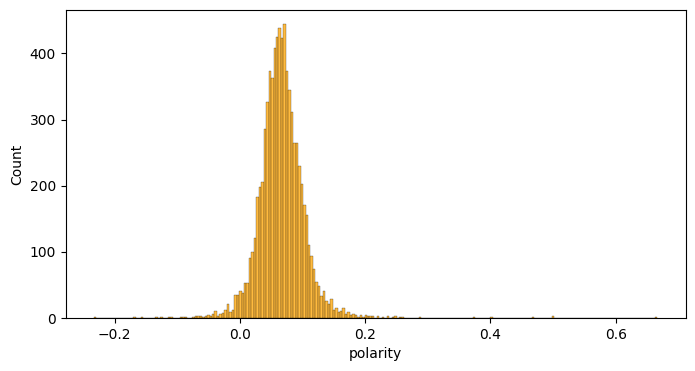

In [48]:
plt.figure(figsize =(8,4))
sns.histplot(headlines['polarity'], color = 'Orange')

In [49]:
snt = SentimentIntensityAnalyzer()

In [50]:
headlines['compound'] = [snt.polarity_scores(v)['compound'] for v in headlines['headline_text']]
headlines['positive'] = [snt.polarity_scores(v)['pos'] for v in headlines['headline_text']]
headlines['negetive'] = [snt.polarity_scores(v)['neg']for v in headlines['headline_text'] ]
headlines['neutral'] = [snt.polarity_scores(v)['neu'] for v in headlines['headline_text']]

In [51]:
headlines.head()

,publish_date,headline_text,subjectivity,polarity,compound,positive,negetive,neutral
0,2001-01-02,status quo will not be disturbed at ayodhya s...,0.298684,0.180702,-0.9839,0.068,0.141,0.791
1,2001-01-03,powerless north india gropes in the dark think...,0.392857,0.089286,-0.8910,0.109,0.156,0.735
2,2001-01-04,the string that pulled stephen hawking to indi...,0.478086,0.089802,0.9178,0.115,0.103,0.782
3,2001-01-05,light combat craft takes india into club class...,0.470967,0.260138,0.9781,0.185,0.126,0.688
4,2001-01-06,light combat craft takes india into club class...,0.464935,0.219481,-0.8625,0.121,0.230,0.649


In [53]:
headlines.to_csv("E://headlines_nlp.csv", index = False)
stocks.to_csv("E://stocks_f.csv", index = False)

# Hybrid Model

In [422]:
stocks_new = yf.download('^BSESN', start='2001-01-01', end='2024-01-01').reset_index()
headlines =  headlines.rename(columns = {"publish_date":"Date"})
stocks_new["Date"] = pd.to_datetime(stocks_new["Date"])

[*********************100%%**********************]  1 of 1 completed


In [423]:
merged = pd.merge(headlines, stocks_new, on = "Date")

In [424]:
merged.head(1)

,Date,headline_text,subjectivity,polarity,compound,positive,negetive,neutral,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,status quo will not be disturbed at ayodhya s...,0.298684,0.180702,-0.9839,0.068,0.141,0.791,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0


In [425]:
print(merged.shape)

(5206, 14)


In [426]:
final = merged[['subjectivity', 'polarity', 'compound',
       'positive', 'negetive', 'neutral', 'Close']]

In [427]:
merged.columns

Index(['Date', 'headline_text', 'subjectivity', 'polarity', 'compound',
       'positive', 'negetive', 'neutral', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume'],
      dtype='object')

In [245]:
from sklearn.preprocessing import MinMaxScaler
scaled  = MinMaxScaler()

In [246]:
scaled_data =  scaled.fit_transform(final)

In [247]:
scaled_data = pd.DataFrame(scaled_data, columns = final.columns)

In [428]:
scaled_data.head()

,subjectivity,polarity,compound,positive,negetive,neutral,Close
0,0.298684,0.564593,0.008050,0.111842,0.317568,0.791,0.023980
1,0.392857,0.439935,0.054503,0.179276,0.351351,0.735,0.024675
2,0.478086,0.440639,0.958948,0.189145,0.231982,0.782,0.025610
3,0.470967,0.672916,0.989099,0.304276,0.283784,0.688,0.026766
4,0.421415,0.347458,0.053303,0.131579,0.265766,0.802,0.025696


In [429]:
y_final = scaled_data.Close
x_final = scaled_data.drop('Close', axis =1)

In [430]:
xf_train, xf_test, yf_train, yf_test = train_test_split(x_final,y_final, test_size  = 0.3)

# RandomForestRegressor

In [511]:
model = RandomForestRegressor(n_estimators=200, max_depth=50)
model.fit(xf_train,yf_train)

RandomForestRegressor(max_depth=50, n_estimators=200)

In [512]:
from sklearn.metrics import mean_squared_error

In [513]:
y_true = yf_test
y_predicted = model.predict(xf_test)

In [514]:
mse = mean_squared_error(y_true,y_predicted)
mse

0.021118644075991243

In [515]:
y_final.shape

(5206,)

In [516]:
score = cross_val_score(model, x_final, y_final,cv = 5, scoring='neg_mean_squared_error')
final_mse = -(score).mean()
final_mse 

0.05241584152244486

In [517]:
prediction = model.predict(xf_test)
prediction

array([0.12047777, 0.35283457, 0.09296342, ..., 0.35243196, 0.19512916,
       0.27061201])

In [518]:
yf_test

419     0.006725
3480    0.420135
1424    0.177987
691     0.037833
649     0.027576
          ...   
5123    0.944152
4931    0.823531
2901    0.274100
2180    0.243098
1991    0.106522
Name: Close, Length: 1562, dtype: float64

# LinearRegression

In [439]:
from sklearn.linear_model import LinearRegression

In [440]:
model_l = LinearRegression()
model_l.fit(xf_train,yf_train)

LinearRegression()

In [441]:
y_true = yf_test
y_predicted = model_l.predict(xf_test)

In [442]:
mse = mean_squared_error(y_true,y_predicted)
mse

0.052614934431459606

In [443]:
score = cross_val_score(model_l, x_final, y_final,cv = 5, scoring='neg_mean_squared_error')
final_mse = -(score).mean()
final_mse 

0.09144715144080677

# DecisionTreeRegressor

In [444]:
model_dt = DecisionTreeRegressor()
model_dt.fit(xf_train,yf_train)

DecisionTreeRegressor()

In [445]:
y_true = yf_test
y_predicted = model_dt.predict(xf_test)

In [446]:
mse = mean_squared_error(y_true,y_predicted)
mse

0.04002095993033109

In [447]:
score = cross_val_score(model_dt, x_final, y_final,cv = 5, scoring='neg_mean_squared_error')
final_mse = -(score).mean()
final_mse 

0.06944699852151584

# SVR

In [448]:
model_svm = SVR()
model_svm.fit(xf_train,yf_train)

SVR()

In [450]:
y_true = yf_test
y_predicted = model_svm.predict(xf_test)

In [451]:
mse = mean_squared_error(y_true,y_predicted)
mse

0.04536081926166597

In [453]:
score = cross_val_score(model_svm, x_final, y_final,cv = 5, scoring='neg_mean_squared_error')
final_mse = -(score).mean()
final_mse 

0.08376673195631626

# Conclusion

In [520]:
Model = ["RandomForestRegressor","LinearRegression","DecisionTreeRegressor", "SVR"]
MSE = [0.05246,0.0914,0.0694, 0.0837]
final_MSEs = pd.DataFrame(columns = ['Models','MSE'])
final_MSEs['Models'] = Model 
final_MSEs['MSE'] = MSE
final_MSEs

,Models,MSE
0,RandomForestRegressor,0.05246
1,LinearRegression,0.09140
2,DecisionTreeRegressor,0.06940
3,SVR,0.08370


From the analysis conducted, it is evident that the RandomForestRegressor is the most effective model for predicting stock closing prices. The model achieved a Mean Squared Error (MSE) of 0.05246, indicating its strong performance in capturing the underlying patterns of the stock data.

For the numerical analysis component, the Root Mean Squared Error (RMSE) is 0.03, which reflects the high accuracy of our statistical predictions. This low RMSE demonstrates that our numerical analysis effectively forecasts stock prices with minimal error.

Given these results, we can confidently conclude that the hybrid model, combining RandomForestRegressor and sentiment analysis, performs excellently. The successful integration of these methods has led to accurate predictions and a robust model, marking the successful completion of the project.

# Thank You